# Notebook Imports


In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

plt.style.use("ggplot")

# Reading Data

In [173]:
df = pd.read_csv("cleaned_data.csv", index_col=0)
df = df.drop(columns=["title"])
df.head()

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_language,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,ET
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,T


# Splitting Dataset


In [174]:
encoding = {"E": 0, "ET": 1, "T": 2, "M": 3}
df.esrb_rating = df.esrb_rating.replace(encoding)

In [175]:
train, val = train_test_split(df, test_size=0.2)


# Data Cleaning

In our data we have a lot of explanatory variables, some of which are possibly not highly correlated with the explanatory variable, and hence would end up causing bias in our bias
 

For this reason, we can remove the variables which are not correlated with the explanatory variable. 

The following cells lists down the variables sorted in ascending order of absolute value of correlation with esrb_rating

In [176]:
train.corr().esrb_rating.sort_values(key= lambda x: abs(x))

animated_blood             -0.007855
mild_suggestive_themes      0.009077
console                     0.018294
cartoon_violence           -0.023010
use_of_alcohol              0.027834
mild_violence              -0.028433
mild_blood                  0.041434
crude_humor                 0.041700
mature_humor                0.043056
fantasy_violence           -0.043110
use_of_drugs_and_alcohol    0.044740
alcohol_reference          -0.048380
mild_lyrics                -0.062318
nudity                      0.075132
mild_language              -0.079654
drug_reference              0.102336
partial_nudity              0.116940
mild_cartoon_violence      -0.124153
lyrics                      0.131284
violence                    0.138129
suggestive_themes           0.171215
language                    0.177332
sexual_content              0.182750
simulated_gambling          0.214179
strong_sexual_content       0.238414
intense_violence            0.252670
sexual_themes               0.262329
m

We remove the variables with abs(correlation) < 0.2

In [177]:
columns_to_drop = train.columns[
    train.corr().esrb_rating.sort_values(key=lambda x: abs(x)) < 0.05
]

train = train.drop(columns=columns_to_drop)
train.head()


,mild_blood,mild_fantasy_violence,mild_language,mild_suggestive_themes,mild_violence,no_descriptors,nudity,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_language,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,esrb_rating
1441,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
938,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,2
735,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
121,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
901,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3


Printing the new correlation matrix between explanatory variables


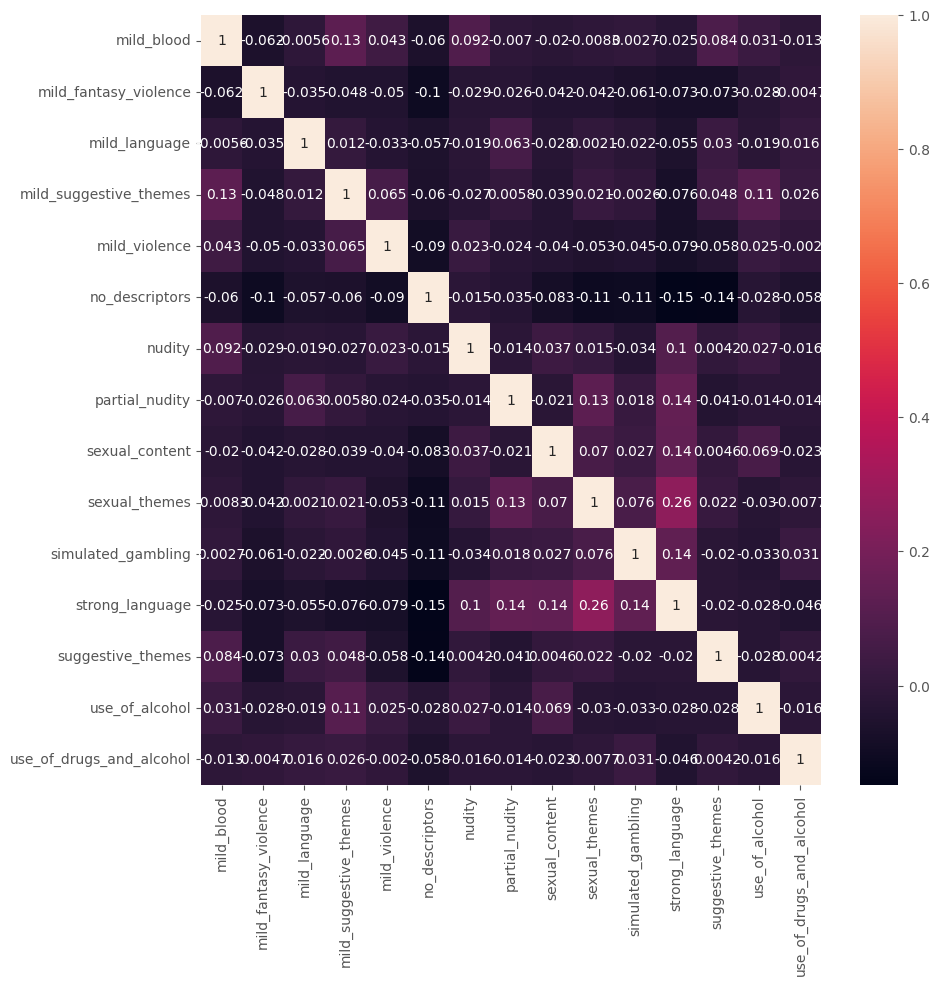

In [178]:
plt.figure(figsize=(10, 10))
sns.heatmap(train.drop(columns="esrb_rating").corr(), annot=True)
plt.show()

In [179]:
train.to_csv("training.csv")

# Data Visualization

<AxesSubplot:xlabel='partial_nudity', ylabel='Density'>

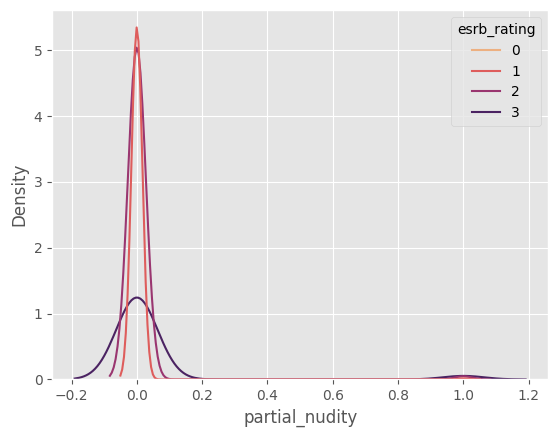

In [180]:

sns.kdeplot(data=train, x="partial_nudity", hue="esrb_rating", warn_singular=False, palette="flare")


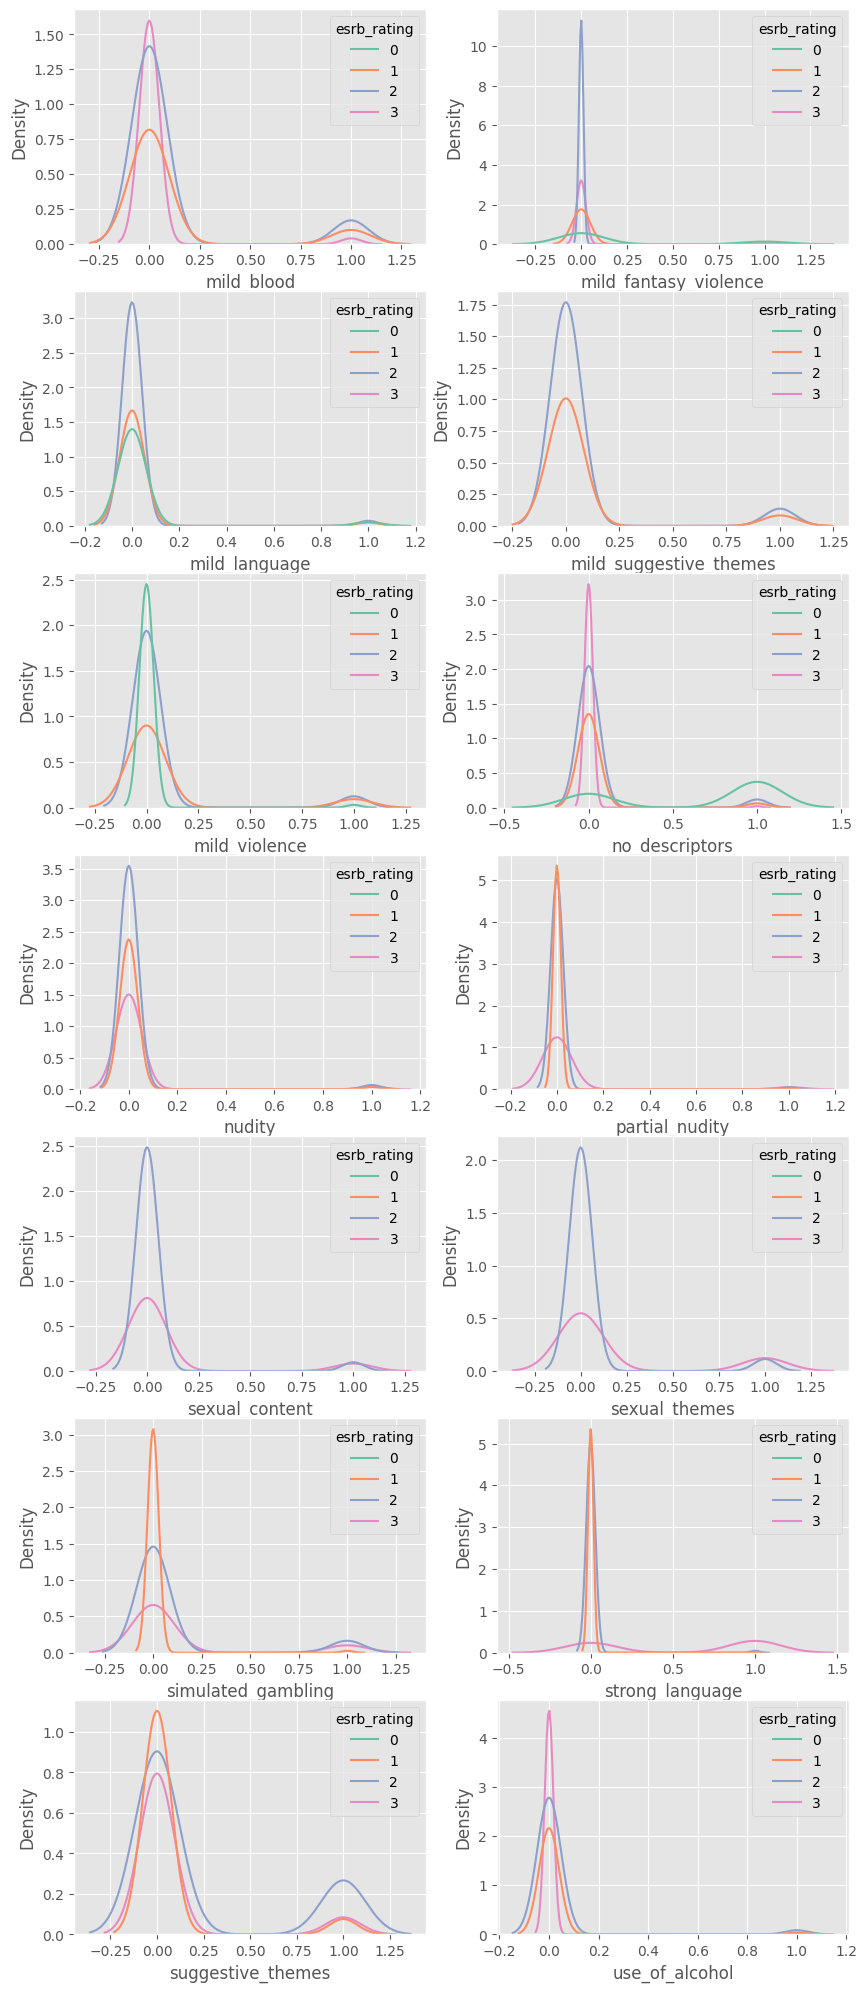

In [181]:


fig, axes = plt.subplots(7, 2, figsize=(10, 25))
axes = axes.flatten()

for ax, col in zip(axes, train.columns): 
    if col == "esrb_rating": 
        continue
    sns.kdeplot(data=train, x=col, hue="esrb_rating", ax=ax, palette="Set2", warn_singular=False)

plt.show()
    